In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

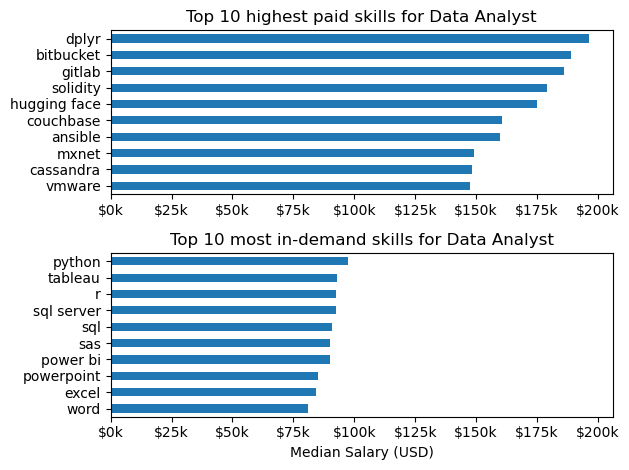

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US = df_DA_US.explode('job_skills')
df_chart = df_DA_US.groupby('job_skills').agg(
count = ('job_skills', 'count'),
median = ('salary_year_avg', 'median')
)
df_DA_skills = df_chart.sort_values('count', ascending = False).head(10).sort_values('median', ascending = False).head(10)
df_DA_top_pay = df_chart.sort_values('median', ascending = False).head(10)

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind = 'barh', y= 'median', ax = ax[0], legend= False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

df_DA_skills.plot(kind = 'barh', y= 'median', ax =ax[1], legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in-demand skills for Data Analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

fig.tight_layout()

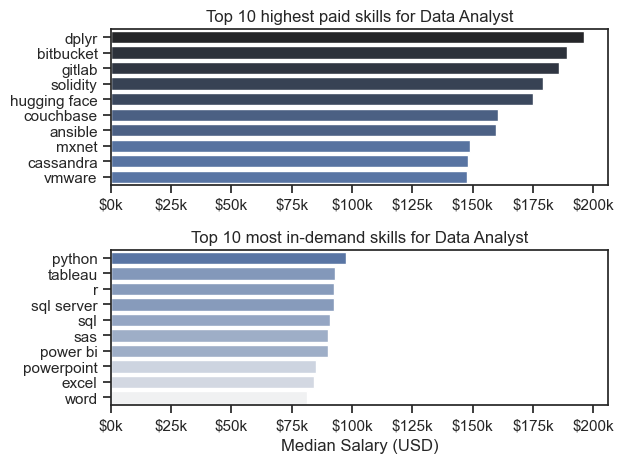

In [16]:

fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax = ax[0], hue = 'median', palette='dark:b_r')

#df_DA_top_pay.plot(kind = 'barh', y= 'median', ax = ax[0], legend= False)

ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
ax[0].legend().remove()

sns.barplot(data = df_DA_skills, x='median', y=df_DA_skills.index, ax = ax[1], hue = 'median', palette='light:b')

#df_DA_skills.plot(kind = 'barh', y= 'median', ax =ax[1], legend = False)

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in-demand skills for Data Analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
ax[1].legend().remove()

fig.tight_layout()

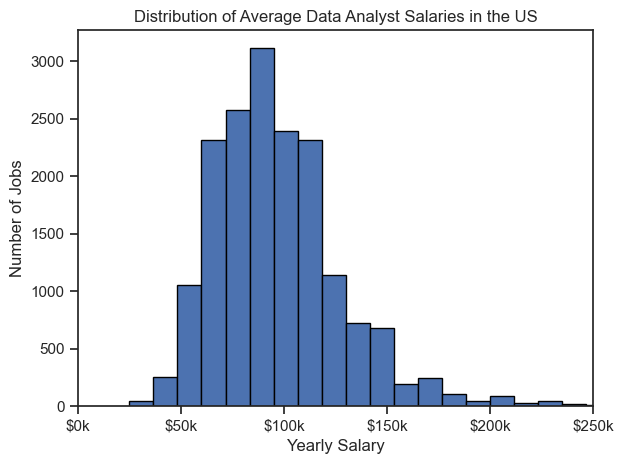

In [ ]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 30, edgecolor = 'black')

# Format x-axis with $ and 'k'
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# Labels and title (optional)
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Average Data Analyst Salaries in the US')
plt.tight_layout()
plt.xlim(0, 250000)
plt.show()

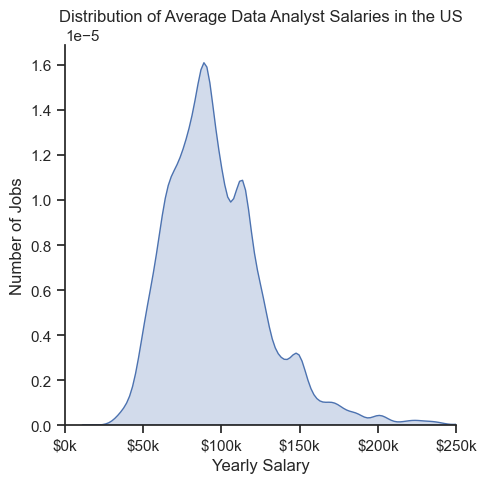

In [21]:
sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill = 'true')
# Labels and title (optional)
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Average Data Analyst Salaries in the US')
plt.tight_layout()
plt.xlim(0, 250000)
# Format x-axis with $ and 'k'
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.show()

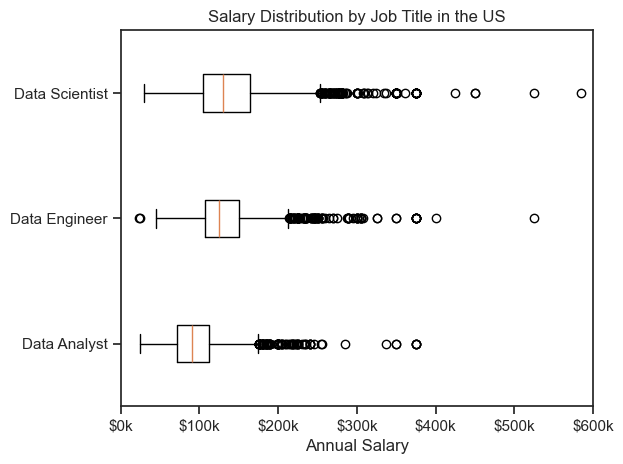

In [23]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scintist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')

# Filter job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# Prepare data for box plot
data_to_plot = [df_US[df_US['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

# Plot
plt.boxplot(data_to_plot, tick_labels=job_titles, vert= False)

# Format y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# Titles and labels
plt.title('Salary Distribution by Job Title in the US')
plt.ylabel('')
plt.xlabel('Annual Salary')
plt.xlim(0, 600000)
plt.tight_layout()
plt.show()

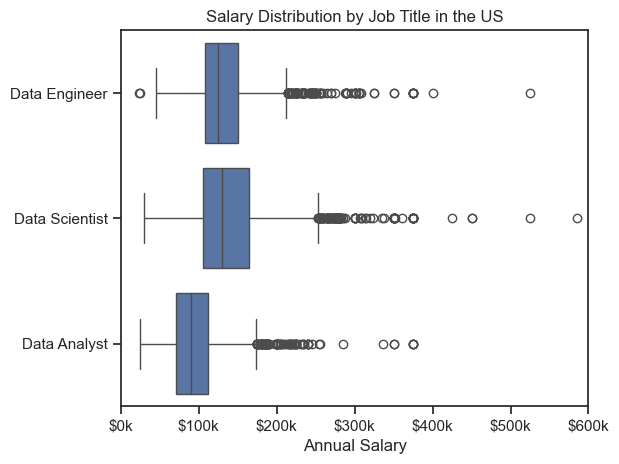

In [26]:
sns.boxplot(data = df_US, x = 'salary_year_avg', y = 'job_title_short')

# Titles and labels
plt.title('Salary Distribution by Job Title in the US')
plt.ylabel('')
plt.xlabel('Annual Salary')
plt.xlim(0, 600000)
plt.tight_layout()
# Format y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.show()